# Random Sample Imputation
___

**Aim**: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

**When should it be used?**

It assumes that the data are missing completely at random(MCAR), same for mean-median-mode.

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.set_index("PassengerId", inplace=True)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
col_names = ["Age", "Fare", "Survived"]
df_temp = df_titanic[col_names]

In [4]:
df_temp

,Age,Fare,Survived
PassengerId,,,
1,22.0,7.2500,0
2,38.0,71.2833,1
3,26.0,7.9250,1
4,35.0,53.1000,1
5,35.0,8.0500,0
...,...,...,...
887,27.0,13.0000,0
888,19.0,30.0000,1
889,NaN,23.4500,0


In [5]:
df_temp.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [6]:
df_temp.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

```DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)```

___

**Parameters**


**n** : int, optional
Number of items from axis to return. Cannot be used with frac. Default = 1 if frac = None.


**frac** : float, optional
Fraction of axis items to return. Cannot be used with n.


**replace** : bool, default False
Allow or disallow sampling of the same row more than once.


**weights** : str or ndarray-like, optional
Default ‘None’ results in equal probability weighting. If passed a Series, will align with target object on index. Index values in weights not found in sampled object will be ignored and index values in sampled object not in weights will be assigned weights of zero. If called on a DataFrame, will accept the name of a column when axis = 0. Unless weights are a Series, weights must be same length as axis being sampled. If weights do not sum to 1, they will be normalized to sum to 1. Missing values in the weights column will be treated as zero. Infinite values not allowed.


**random_state** : int, array-like, BitGenerator, np.random.RandomState, optional
If int, array-like, or BitGenerator (NumPy>=1.17), seed for random number generator If np.random.RandomState, use as numpy RandomState object.

Changed in version 1.1.0: array-like and BitGenerator (for NumPy>=1.17) object now passed to np.random.RandomState() as seed


**axis** : {0 or ‘index’, 1 or ‘columns’, None}, default None
Axis to sample. Accepts axis number or name. Default is stat axis for given data type (0 for Series and DataFrames).

ignore_index : bool, default False
If True, the resulting index will be labeled 0, 1, …, n - 1.

New in version 1.3.0.


**Returns**
Series or DataFrame
A new object of same type as caller containing n items randomly sampled from the caller object.

In [7]:
df_temp['Age'].dropna().sample()

PassengerId
381    42.0
Name: Age, dtype: float64

In [16]:
def impute_nan(df, mode, *variables):
    returnList = []
    
    for variable in variables:
        newName = "new_" + variable + f'_{mode}'
        if mode=='mean':
            fillValue = df[variable].mean()

        elif mode=='median':
            fillValue = df[variable].median()

        elif mode=='mode':
            fillValue = df[variable].mode()

        else:
            raise ValueError("invalid mode")

        df[newName] = df[variable].fillna(fillValue)
        returnList.append(newName)
        
    return returnList

In [12]:
df_temp['Age'].dropna().sample(random_state=0)

PassengerId
424    28.0
Name: Age, dtype: float64

In [13]:
df_temp['Age'].dropna().sample(n=1, random_state=0)

PassengerId
424    28.0
Name: Age, dtype: float64

In age column 177 values are empty so, need 177 value. n=177

In [14]:
no_null_values = df_temp['Age'].isnull().sum()

df_temp['Age'].dropna().sample(n=no_null_values, random_state=0)

PassengerId
424    28.00
178    50.00
306     0.92
293    36.00
890    26.00
       ...  
540    22.00
268    25.00
353    15.00
100    34.00
690    15.00
Name: Age, Length: 177, dtype: float64

In [15]:
df_temp['Age'].dropna().sample(n=df_temp['Age'].isnull().sum(), random_state=0)

PassengerId
424    28.00
178    50.00
306     0.92
293    36.00
890    26.00
       ...  
540    22.00
268    25.00
353    15.00
100    34.00
690    15.00
Name: Age, Length: 177, dtype: float64

In [69]:
def impute_nan_random(df, random_state, *variables):
    returnList = []
    
    for variable in variables:
        newName = "new_" + variable + "_random"
        
        count_null_values = df[variable].isnull().sum()
        # values to fill null indices
        random_sample = df[variable].dropna().sample(n=count_null_values, random_state=random_state)
        
        # null value indices of main DF
        null_value_indices = df.loc[df[variable].isnull(), :].index
        
        df[newName] = df[variable]
        df.loc[null_value_indices, newName] = random_sample.values
        
        returnList.append(newName)
        
    return returnList

In [70]:
impute_nan_random(df_temp, 0, 'Age')

<ipython-input-69-171bc3845ccf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[newName] = df[variable]
C:\Users\Kaushik Pal\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


['new_Age_random']

In [71]:
df_temp

,Age,Fare,Survived,new_Age_random
PassengerId,,,,
1,22.0,7.2500,0,22.0
2,38.0,71.2833,1,38.0
3,26.0,7.9250,1,26.0
4,35.0,53.1000,1,35.0
5,35.0,8.0500,0,35.0
...,...,...,...,...
887,27.0,13.0000,0,27.0
888,19.0,30.0000,1,19.0
889,NaN,23.4500,0,15.0


In [72]:
df_temp['new_Age_random'].isnull().sum()

0

In [73]:
x = df_temp['Age'].dropna().sample(n=df_temp['Age'].isnull().sum(), random_state=0)

In [74]:
x.index

Int64Index([424, 178, 306, 293, 890, 596, 638,  55, 457, 111,
            ...
            180,  25, 631, 459,  50, 540, 268, 353, 100, 690],
           dtype='int64', name='PassengerId', length=177)

In [75]:
x.index[0]

424

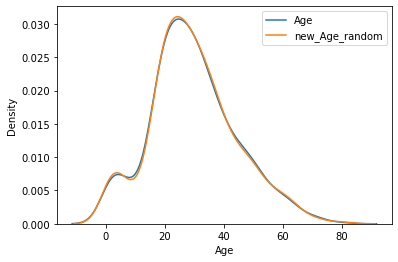

In [76]:
sns.kdeplot('Age', legend='Age', data=df_temp)
sns.kdeplot('new_Age_random', legend='new_Age_random' ,data=df_temp)
plt.legend(['Age', 'new_Age_random'])
plt.show()

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

 ##### Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [102]:
df_temp=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df_temp.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [79]:
df_temp['Age_NAN']=np.where(df_temp['Age'].isnull(),1,0)
df_temp

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [80]:
df_temp['Age'].median()

28.0

In [81]:
df_temp['Age'].fillna(df_temp.Age.median(),inplace=True)

In [82]:
df_temp.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

#### End of Distribution imputation

In [112]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

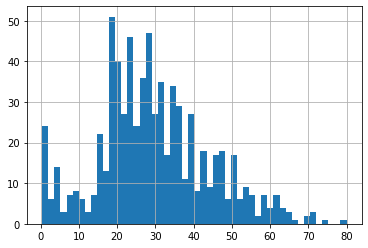

In [113]:
df.Age.hist(bins=50)

<AxesSubplot:xlabel='Age', ylabel='Count'>

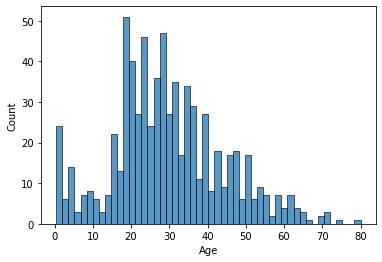

In [114]:
sns.histplot(df['Age'], bins=50)

![normal distrbution image 1](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/350px-Standard_deviation_diagram.svg.png)

![normal distrbution image 2](https://blogs.sas.com/content/iml/files/2019/07/rule6895.png)

In [115]:
std_age = df['Age'].std()
mean_age = df['Age'].mean()

extreme_right = mean_age + (3*std_age)
extreme_right

73.27860964406095

<AxesSubplot:xlabel='Age'>

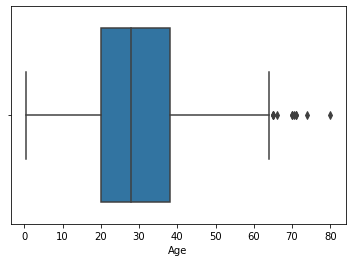

In [116]:
sns.boxplot(x='Age', data=df)

In [117]:
def impute_nan_dist(df, *variables):
    returnList = []
    
    for variable in variables:
        newName = "new_" + variable + "_end_dist"
        
        std_variable = df[variable].std()    # standard deviation of variable column
        mean_variable = df[variable].mean()  # mean of variable column
        median_variable = df[variable].median() # median of variable column
        extreme = mean_variable + (3*std_variable)  # fill value
        
        df[newName] = df[variable].fillna(extreme)
        df[variable].fillna(median_variable, inplace=True)
        
        returnList.append(newName)
        
    return returnList

Why are we filling with right extreme values, Because in boxplot of Age feature there outliers are in right side, so we are taking right side value. If boxplot containing outliers in left side then use left-extreme value(- right-extreme)

in the above unction we are filling our main variable's null values with median, but we can also use mean or mode to fill those values.

In [118]:
impute_nan_dist(df, 'Age')

['new_Age_end_dist']

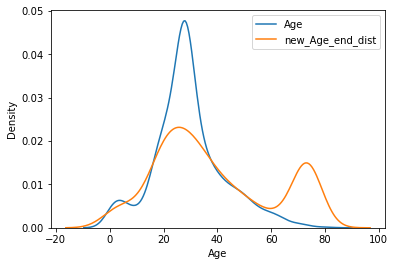

In [125]:
sns.kdeplot('Age', legend='Age', data=df)
sns.kdeplot('new_Age_end_dist', legend='new_Age_end_dist' ,data=df)
plt.legend(['Age', 'new_Age_end_dist'])
plt.show()

<AxesSubplot:xlabel='Age'>

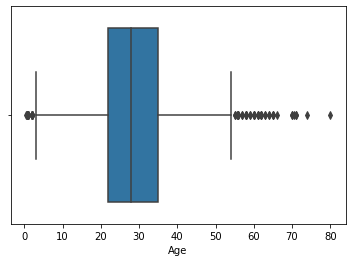

In [120]:
sns.boxplot(x='Age', data=df)

<AxesSubplot:xlabel='new_Age_end_dist'>

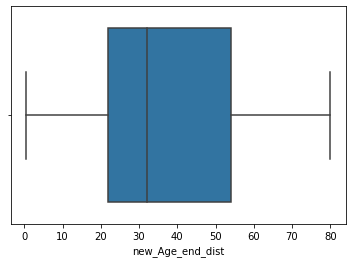

In [121]:
sns.boxplot(x='new_Age_end_dist', data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

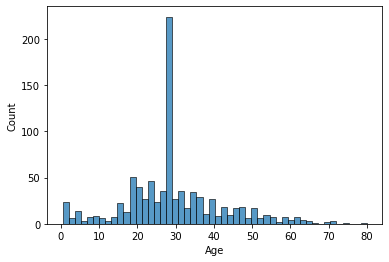

In [122]:
sns.histplot(df['Age'], bins=50)

<AxesSubplot:xlabel='new_Age_end_dist', ylabel='Count'>

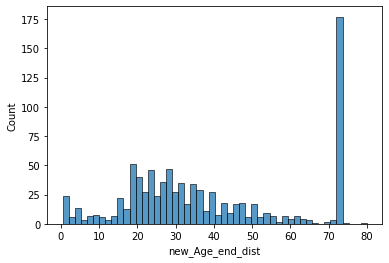

In [123]:
sns.histplot(df['new_Age_end_dist'], bins=50)

### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask predictive power of the original variable by distorting its distribution
- If the number of Na is big, it will mask true outliers in the distribution
- If the number of Na is small, the replaced Na may be considered an outlier and pre-processed in a subsequent step of feture engineering